# Classificador Imagem MNIST

Não tem base de dados externa, é importado a base de dados internamento do tensorflow MNIST

## Importando bibliotecas

In [5]:
!pip install -q tensorflow==2.16.1

In [6]:
# Importacao desta lib para desativar erro no TensorFlow
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [8]:
tf.__version__, np.__version__

('2.16.1', '1.26.4')

## Carregar o dataset MNIST

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Pré-processar os dados

In [11]:
x_train = x_train / 255.0  # Normalizando as imagens
x_test = x_test / 255.0

## Criar Estrutura da Rede Neural

In [12]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Achatar a imagem de 28x28 para um vetor de 784
    Dense(128, activation='relu'),  # Camada densa com 128 neurônios
    Dense(10, activation='softmax')  # 10 neurônios de saída (10 classes, de 0 a 9)
])

/home/lucas/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Treinar o modelo

In [15]:
model.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8690 - loss: 0.4659 - val_accuracy: 0.9540 - val_loss: 0.1579
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9577 - loss: 0.1426 - val_accuracy: 0.9622 - val_loss: 0.1290
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9718 - loss: 0.0942 - val_accuracy: 0.9707 - val_loss: 0.0978
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9812 - loss: 0.0631 - val_accuracy: 0.9720 - val_loss: 0.0937
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0483 - val_accuracy: 0.9734 - val_loss: 0.0930


## Fazer a previsão em uma imagem de teste

In [21]:
# Escolher uma imagem aleatória do conjunto de teste
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
test_label = y_test[random_index]

In [22]:
# Adicionar uma dimensão para o batch
test_image_batch = np.expand_dims(test_image, axis=0)

In [23]:
# Fazer a previsão
predictions = model.predict(test_image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


## Exibir o resultado

In [24]:
predicted_class = np.argmax(predictions)
print(f"A imagem pertence à classe: {predicted_class}")
print(f"Classe correta: {test_label}")

A imagem pertence à classe: 9
Classe correta: 9


## Exibir a imagem e as probabilidades

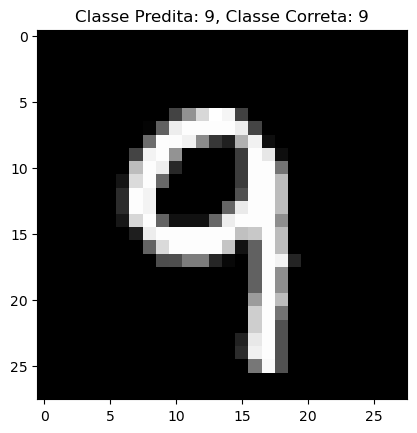

In [25]:
plt.imshow(test_image, cmap='gray')
plt.title(f"Classe Predita: {predicted_class}, Classe Correta: {test_label}")
plt.show()